In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# EDA

In [2]:
data=pd.read_csv("/content/12 (2) (Data).csv")
data.head(5)

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USDT
0,1.640560e+12,12-27-2021,XRP-USDT,0.9200,0.9237,0.9200,0.9226,2384512.0,2.198450e+06
1,1.640480e+12,12-26-2021,XRP-USDT,0.9252,0.9334,0.9052,0.9200,163438501.0,1.499400e+08
2,1.640390e+12,12-25-2021,XRP-USDT,0.9114,0.9350,0.8981,0.9252,250074945.0,2.302303e+08
3,1.640300e+12,12-24-2021,XRP-USDT,0.9941,0.9966,0.8964,0.9115,567234092.0,5.377035e+08
4,1.640220e+12,12-23-2021,XRP-USDT,0.9538,1.0167,0.9372,0.9941,479436230.0,4.729372e+08


In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["symbol"]=le.fit_transform(data["symbol"])
data["date"]=pd.to_datetime(data["date"])
data.set_index("date",inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1334 entries, 2021-12-27 to 2018-05-04
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unix         1334 non-null   float64
 1   symbol       1334 non-null   int64  
 2   open         1334 non-null   float64
 3   high         1334 non-null   float64
 4   low          1334 non-null   float64
 5   close        1334 non-null   float64
 6   Volume XRP   1334 non-null   float64
 7   Volume USDT  1334 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 93.8 KB


<Axes: xlabel='date', ylabel='close'>

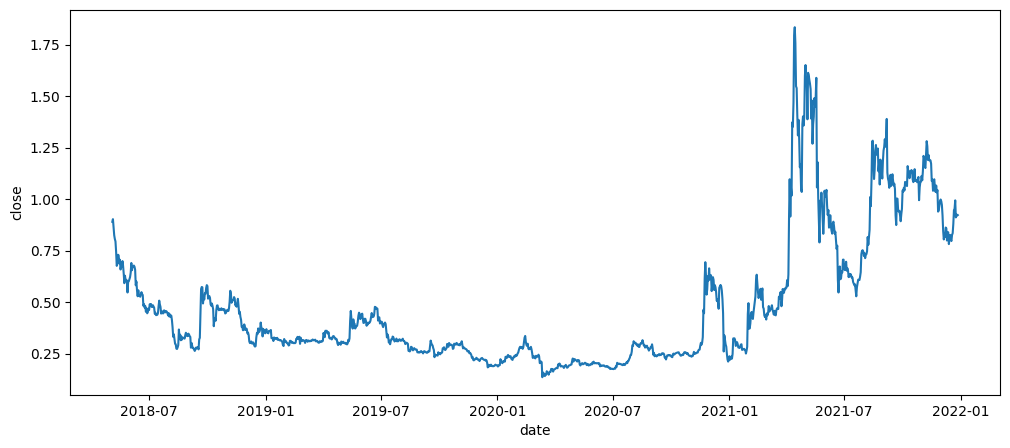

In [5]:
plt.figure(figsize=(12,5))
sns.lineplot(x="date",y="close",data=data)

# Data Preprocessing

In [6]:
df=data[["close"]].values

In [7]:
scaler=MinMaxScaler(feature_range=(0,1))
scaler_data=scaler.fit_transform(df)

In [8]:
def create_sequence(df,sequence_length):
    X=[]
    y=[]
    for i in range (sequence_length,len(df)):
        X.append(df[i-sequence_length:i,0])
        y.append(df[i,0])
    return np.array(X),np.array(y)

In [9]:
sequence_length=10

In [10]:
X,y=create_sequence(scaler_data,sequence_length)

In [11]:
X=X.reshape((X.shape[0],X.shape[1],1))
print(X.shape,y.shape)

(1324, 10, 1) (1324,)


# Model

In [12]:
model=Sequential()

In [13]:
model.add(LSTM(50,activation="relu",input_shape=(X.shape[1],X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.fit(X,y,epochs=100,batch_size=32,verbose=1)

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0330
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0039
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0027
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0025
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026
Epoch 12/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020
Epoch 13/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025
Epoch 14/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021
Epoch 15/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0023
Epoc

# Model Evaluation

In [17]:
loss=model.evaluate(X,y)
print("Model loss:",loss)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013
Model loss: 0.0007547392742708325


In [18]:
predictions=model.predict(X)
predictions=scaler.inverse_transform(predictions)
print(predictions[:10])

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
[[0.81660926]
 [0.7897156 ]
 [0.7874695 ]
 [0.80373645]
 [0.80493784]
 [0.7878355 ]
 [0.8104754 ]
 [0.82465273]
 [0.80952656]
 [0.832115  ]]


In [19]:
actual_values=scaler.inverse_transform(y.reshape(-1,1))

# Actual Vs Predicted

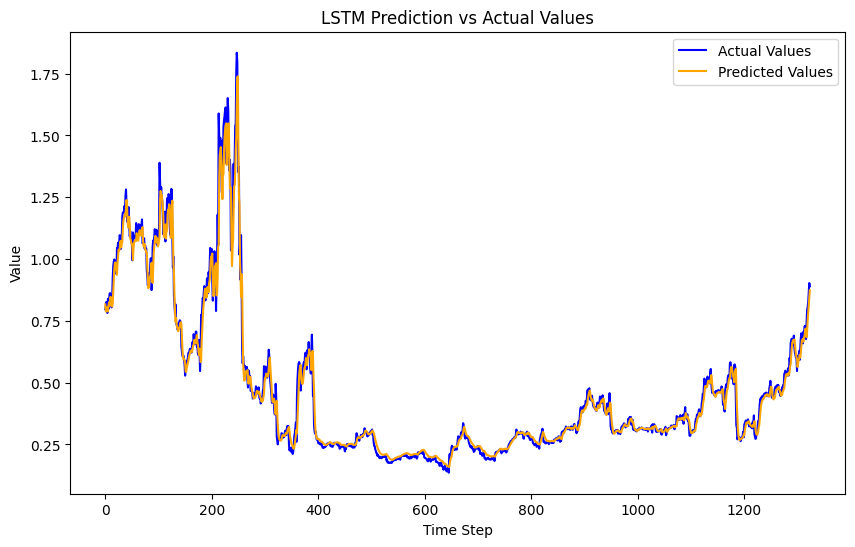

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual Values",color="blue")
plt.plot(predictions, label="Predicted Values",color="orange")
plt.legend()
plt.title('LSTM Prediction vs Actual Values')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.show()